<center><h1>Wong_Jonathan_HW2</h1></center>
<br>
<br>

Name: Jonathan Wong
<br>
Github Username: jonathanwong150
<br>
USC ID: 9171949586

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [282]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from collections import Counter
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

Get the Cycle Power Plant Data Set

In [283]:
# Read data from Excel file
df = pd.read_excel("../data/CCPP/Folds5x2_pp.xlsx")

### (b) Exploring the data

#### i. rows and columns

In [284]:
rows, cols = df.shape
columns = df.columns.tolist()

print(f"The dataset has {rows} rows and {cols} columns.")
print("Each row represents a single data point of the conditions and output of the plant at a given hour.")
print("Columns represent the ambient variables (AT, V, AP, RH) and the net hourly electrical energy output (PE) of the plant.")

The dataset has 9568 rows and 5 columns.
Each row represents a single data point of the conditions and output of the plant at a given hour.
Columns represent the ambient variables (AT, V, AP, RH) and the net hourly electrical energy output (PE) of the plant.


#### ii. pairwise scatterplots of all the varianbles

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

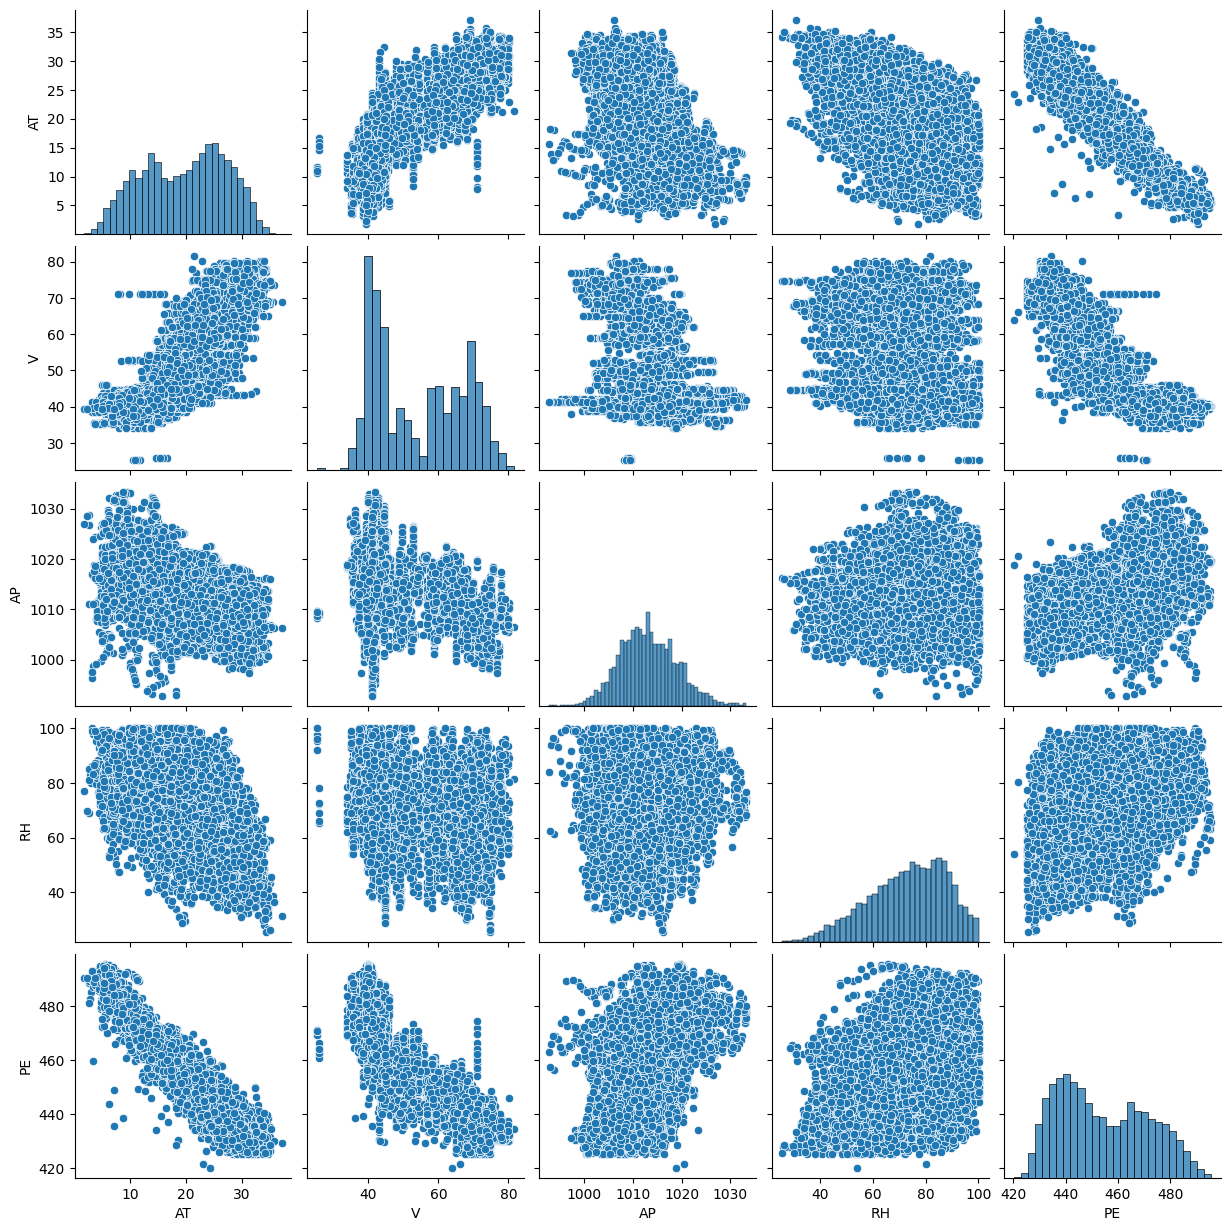

In [310]:
sns.pairplot(df)
plt.show()

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [286]:
# Initialize an empty DataFrame to store summary statistics
summary = pd.DataFrame()

summary['Mean'] = df.mean()
summary['Median'] = df.median()
summary['Range'] = df.max() - df.min()
summary['Q1'] = df.quantile(0.25)
summary['Q3'] = df.quantile(0.75)
summary['IQR'] = summary['Q3'] - summary['Q1']

print(summary)

           Mean    Median  Range         Q1       Q3      IQR
AT    19.651231    20.345  35.30    13.5100    25.72  12.2100
V     54.305804    52.080  56.20    41.7400    66.54  24.8000
AP  1013.259078  1012.940  40.41  1009.1000  1017.26   8.1600
RH    73.308978    74.975  74.60    63.3275    84.83  21.5025
PE   454.365009   451.550  75.50   439.7500   468.43  28.6800


### (c) Simple Linear Regression

  Predictor  Coefficient   Std Err     T Value  P Value
0        AT    -2.171320  0.007443 -291.715195      0.0
1         V    -1.168135  0.006776 -172.401540      0.0
2        AP     1.489872  0.025126   59.296232      0.0
3        RH     0.455650  0.011006   41.398730      0.0
Is the model with predictor AT statistically significant? Yes
Is the model with predictor V statistically significant? Yes
Is the model with predictor AP statistically significant? Yes
Is the model with predictor RH statistically significant? Yes


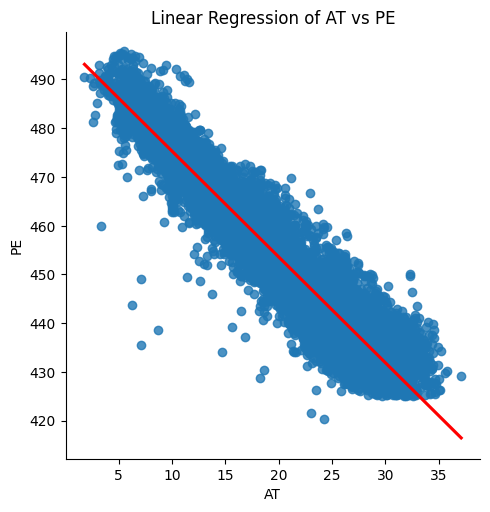

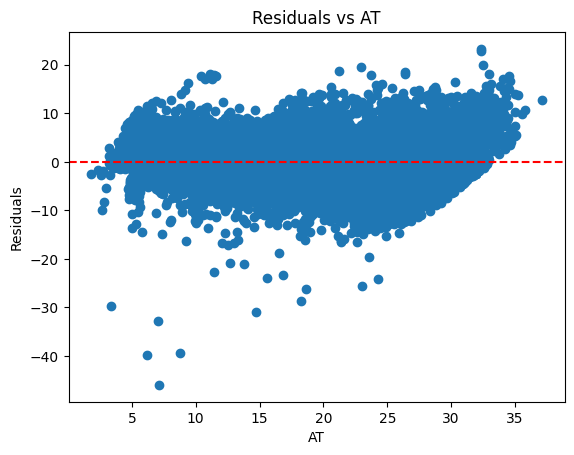

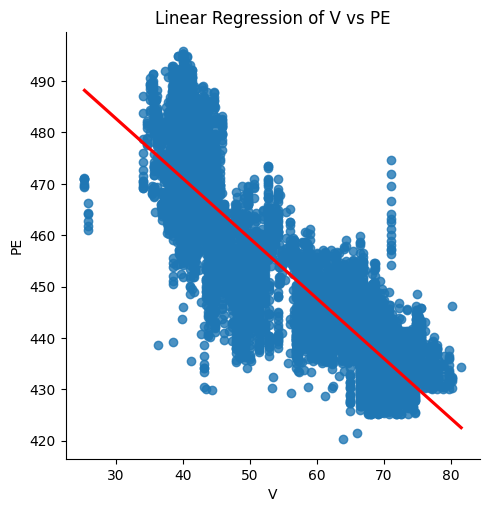

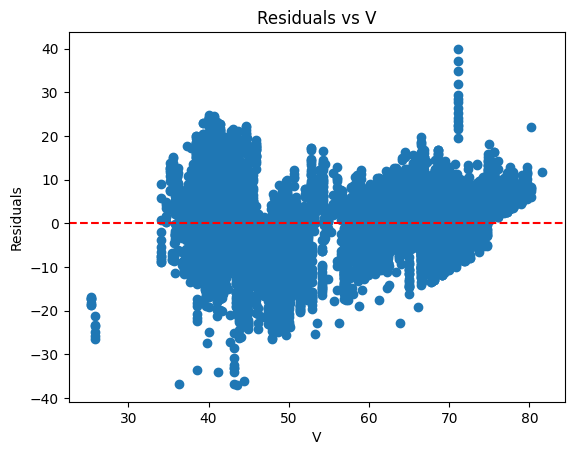

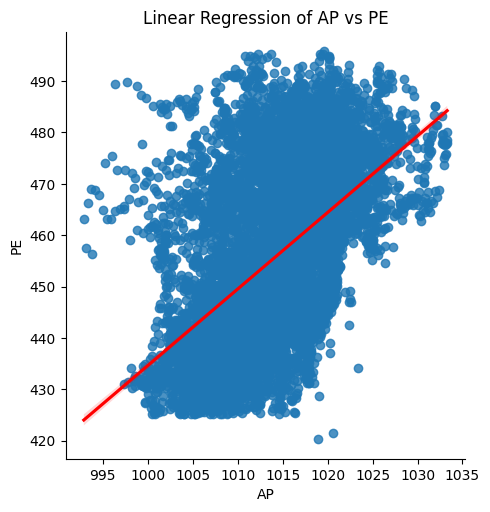

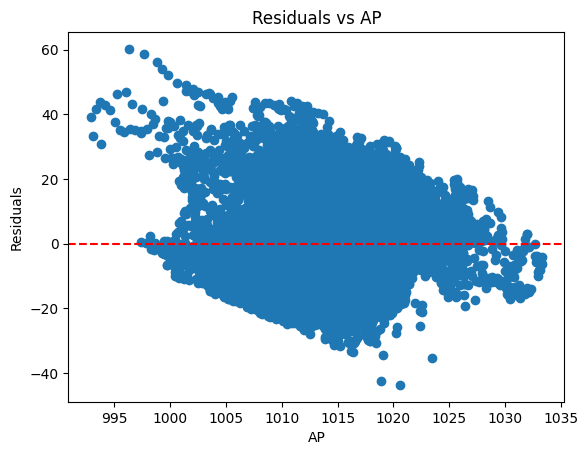

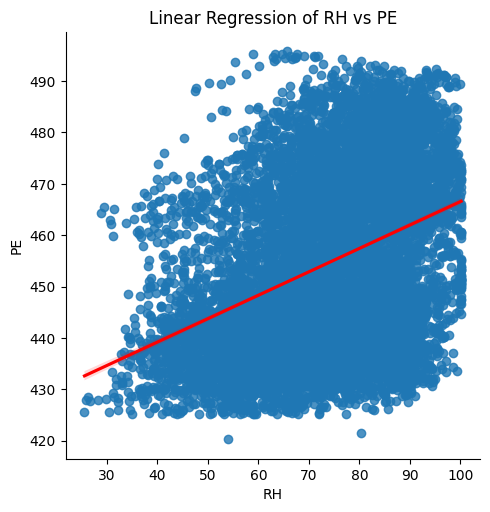

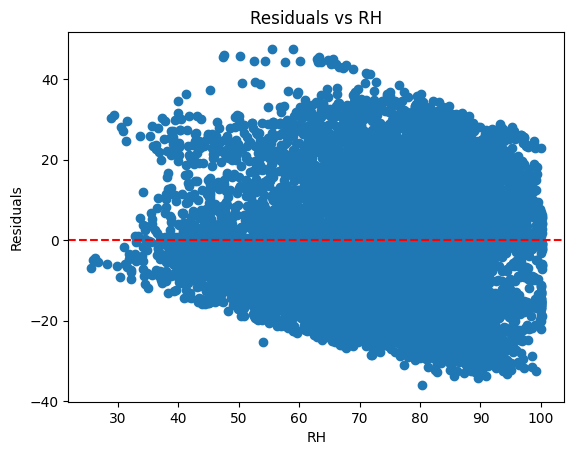

In [287]:
# List of predictor variables
predictors = ['AT', 'V', 'AP', 'RH']

res = []

# Loop through each predictor and fit a linear regression model
for predictor in predictors:
    X = df[[predictor]] 
    y = df['PE'] 
    
    # Add constant term to the predictor
    X = sm.add_constant(X)
    
    # Fit model
    model = sm.OLS(y, X).fit()
    
    coef = model.params[predictor]
    stdErr = model.bse[predictor]
    tVal = model.tvalues[predictor]
    pVal = model.pvalues[predictor]
    
    res.append({
        'Predictor': predictor,
        'Coefficient': coef,
        'Std Err': stdErr,
        'T Value': tVal,
        'P Value': pVal
    })

resDf = pd.DataFrame(res)
print(resDf)

alpha = 0.05
sigPredictors = []

# Loop through each row in the DataFrame
for index, row in resDf.iterrows():
    predictor = row['Predictor']
    pVal = row['P Value']
    
    # Check for statistical significance
    if pVal < alpha:
        significant = 'Yes'
        sigPredictors.append(predictor)
    else:
        significant = 'No'
    
    print(f"Is the model with predictor {predictor} statistically significant? {significant}")

# Loop through each predictor and plot regression line and residuals
for predictor in predictors:
    sns.lmplot(x=predictor, y='PE', data=df, line_kws={'color': 'red'})
    plt.title(f"Linear Regression of {predictor} vs PE")
    plt.show()
    # Plot residuals
    X = df[[predictor]]
    y = df['PE']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    residuals = model.resid
    plt.scatter(df[predictor], residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f"Residuals vs {predictor}")
    plt.xlabel(predictor)
    plt.ylabel("Residuals")
    plt.show()


### (d) Multiple Regression

In [288]:
X = df[predictors] 
y = df['PE']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

alpha = 0.05
pValues = model.pvalues

# Find predictors that reject the null hypothesis
sigPredictors = pValues[pValues < alpha].index.tolist()

if 'const' in sigPredictors:
    sigPredictors.remove('const')
print(f"We can reject the null hypothesis for the following predictors: {sigPredictors}")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:27:47   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

### (e) 1c Compare to 1d

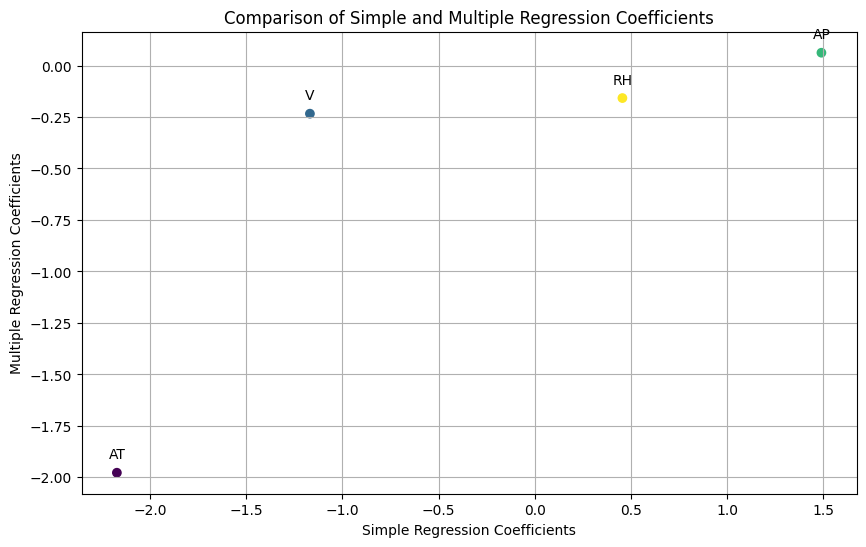

In [289]:
simpleCoef = resDf['Coefficient'].values
multCoef = model.params.values[1:]  # Exclude the intercept

plt.figure(figsize=(10, 6))
plt.scatter(simpleCoef, multCoef, c=np.arange(len(predictors)), cmap='viridis')
for i, label in enumerate(predictors):
    plt.annotate(label, (simpleCoef[i], multCoef[i]), textcoords="offset points", xytext=(0, 10), ha='center')
plt.xlabel("Simple Regression Coefficients")
plt.ylabel("Multiple Regression Coefficients")
plt.title("Comparison of Simple and Multiple Regression Coefficients")
plt.grid(True)
plt.show()

### (f) Nonlinear Association

In [290]:
nonlinResults = []

alpha = 0.05

# Loop through each predictor to fit the polynomial regression model
for predictor in predictors:
    # Prepare data
    X = df[[predictor]]
    X[f"{predictor}^2"] = X[predictor] ** 2
    X[f"{predictor}^3"] = X[predictor] ** 3
    
    y = df['PE']
    X = sm.add_constant(X)
    
    model = sm.OLS(y, X).fit()
    
    # Extract the p-values for polynomial terms
    pValues = model.pvalues[1:]  
    
    # Check for statistical significance
    sigTerms = pValues[pValues < alpha].index.tolist()

    nonlinResults.append({
        'Predictor': predictor,
        'Significant Terms': sigTerms
    })

nonlinResDf = pd.DataFrame(nonlinResults)
print(nonlinResDf)

nonlinAssocPredictors = []

# Loop through each row in the DataFrame
for index, row in nonlinResDf.iterrows():
    predictor = row['Predictor']
    sigTerms = row['Significant Terms']
    
    # Check for nonlinearity by looking for both X^2 and X^3 terms
    if all(term in sigTerms for term in [f"{predictor}^2", f"{predictor}^3"]):
        nonlinAssocPredictors.append(predictor)
        print(f"Nonlinear association detected for predictor {predictor} with significant terms {sigTerms}")

if nonlinAssocPredictors:
    print(f"The following predictors show evidence of nonlinear association: {nonlinAssocPredictors}")
else:
    print("No evidence of nonlinear association was found for any of the predictors.")


  Predictor Significant Terms
0        AT  [AT, AT^2, AT^3]
1         V          [V, V^3]
2        AP  [AP, AP^2, AP^3]
3        RH  [RH, RH^2, RH^3]
Nonlinear association detected for predictor AT with significant terms ['AT', 'AT^2', 'AT^3']
Nonlinear association detected for predictor AP with significant terms ['AP', 'AP^2', 'AP^3']
Nonlinear association detected for predictor RH with significant terms ['RH', 'RH^2', 'RH^3']
The following predictors show evidence of nonlinear association: ['AT', 'AP', 'RH']


/var/folders/nh/0l6krwxs71x_84dvv_z2v3540000gn/T/ipykernel_51218/4165921880.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f"{predictor}^2"] = X[predictor] ** 2
/var/folders/nh/0l6krwxs71x_84dvv_z2v3540000gn/T/ipykernel_51218/4165921880.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f"{predictor}^3"] = X[predictor] ** 3
/var/folders/nh/0l6krwxs71x_84dvv_z2v3540000gn/T/ipykernel_51218/4165921880.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

### (g) Interactions of Predictors

In [291]:
# Find all pairwise interaction terms
interactTerms = [f"{a}:{b}" for a, b in combinations(predictors, 2)]

# Create formula for the full model with interaction terms
formula = 'PE ~ ' + ' + '.join(predictors) + ' + ' + ' + '.join(interactTerms)

fullModel = sm.formula.ols(formula, data=df).fit()
print(fullModel.summary())

alpha = 0.05
pValues = fullModel.pvalues

# Identify interaction terms that reject the null hypothesis
sigInteractTerms = pValues.loc[interactTerms][pValues.loc[interactTerms] < alpha].index.tolist()

if sigInteractTerms:
    print(f"The following interaction terms are statistically significant: {sigInteractTerms}")
else:
    print("No interaction terms are statistically significant.")


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:27:48   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

### (h) Improvement

In [292]:
# Separate data into training and testing
dfTrain, dfTest = train_test_split(df, test_size=0.3, random_state=38)

# Model 1: With only original predictors
XTrain1 = sm.add_constant(dfTrain[predictors])
yTrain = dfTrain['PE']
model1 = sm.OLS(yTrain, XTrain1).fit()
XTest1 = sm.add_constant(dfTest[predictors])
yTest = dfTest['PE']
predictions1 = model1.predict(XTest1)
mseTrain1 = mean_squared_error(yTrain, model1.predict(XTrain1))
mseTest1 = mean_squared_error(yTest, predictions1)

# Model 2: With interaction terms and quadratic terms
interactTerms = [f"{a}:{b}" for a, b in combinations(predictors, 2)]
quadraticTerms = [f"{var}**2" for var in predictors]
allTerms = predictors + interactTerms + quadraticTerms
formula = 'PE ~ ' + ' + '.join(allTerms)
model2 = sm.formula.ols(formula, data=dfTrain).fit()

# Select feautures by p-values
alpha = 0.05
sigVars = model2.pvalues[model2.pvalues < alpha].index.tolist()
if 'Intercept' in sigVars:
    sigVars.remove('Intercept')
reduced = 'PE ~ ' + ' + '.join(sigVars)
reducedModel2 = sm.formula.ols(reduced, data=dfTrain).fit()

predictions2 = reducedModel2.predict(dfTest)
mseTrain2 = mean_squared_error(yTrain, reducedModel2.predict(dfTrain))
mseTest2 = mean_squared_error(yTest, predictions2)

print(f"Model 1: Train MSE = {mseTrain1}, Test MSE = {mseTest1}")
print(f"Model 2 (Reduced): Train MSE = {mseTrain2}, Test MSE = {mseTest2}")

Model 1: Train MSE = 20.875666549558193, Test MSE = 20.526796747807953
Model 2 (Reduced): Train MSE = 24.878103827015845, Test MSE = 24.896778597228696


### (i) KNN

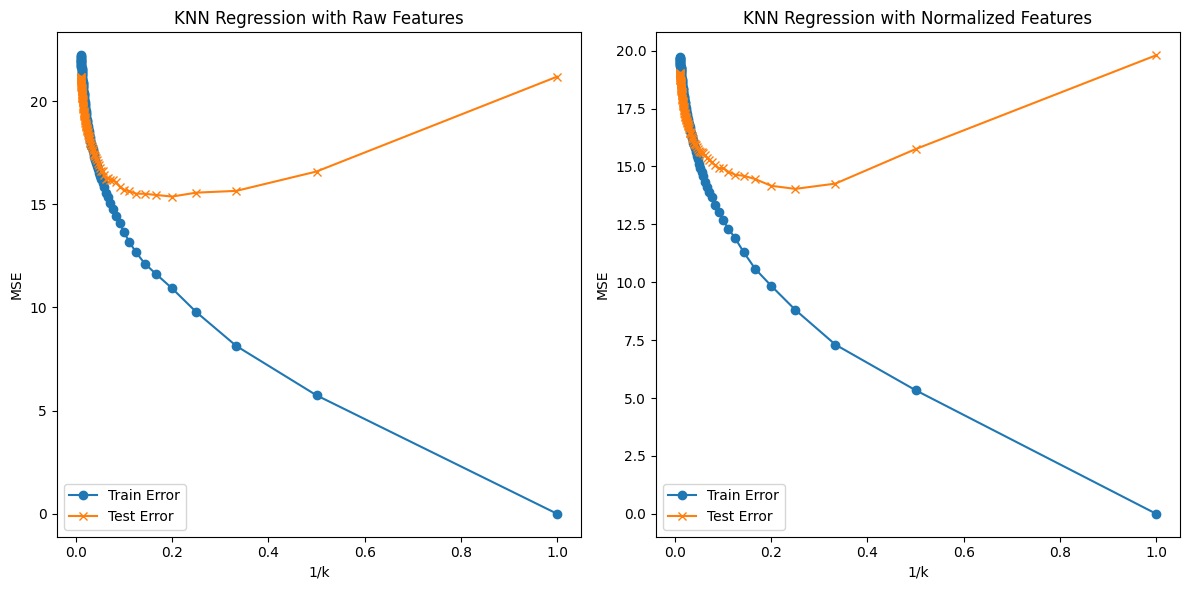

The best k value for raw features is 5 with MSE: 15.377099962382452
The best k value for normalized features is 4 with MSE: 14.032664544148375


In [293]:
XRaw = df[predictors]
y = df['PE']

# Normalize features
scaler = StandardScaler()
XNormalized = scaler.fit_transform(XRaw)

# Split the data
XTrainRaw, XTestRaw, yTrain, yTest = train_test_split(XRaw, y, test_size=0.3, random_state=38)
XTrainNormal, XTestNormal = train_test_split(XNormalized, test_size=0.3, random_state=38)

trainErrorsRaw = []
testErrorsRaw = []
trainErrorsNorm = []
testErrorsNorm = []

kVals = list(range(1, 101))

# Loop through k values and calculate MSEs
for k in kVals:
    # Raw features
    knnRaw = KNeighborsRegressor(n_neighbors=k)
    knnRaw.fit(XTrainRaw, yTrain)
    trainErrorsRaw.append(mean_squared_error(yTrain, knnRaw.predict(XTrainRaw)))
    testErrorsRaw.append(mean_squared_error(yTest, knnRaw.predict(XTestRaw)))

    # Normalized features
    knnNorm = KNeighborsRegressor(n_neighbors=k)
    knnNorm.fit(XTrainNormal, yTrain)
    trainErrorsNorm.append(mean_squared_error(yTrain, knnNorm.predict(XTrainNormal)))
    testErrorsNorm.append(mean_squared_error(yTest, knnNorm.predict(XTestNormal)))

kValsInv = [1 / k for k in kVals]

plt.figure(figsize=(12, 6))

# Plot for raw
plt.subplot(1, 2, 1)
plt.plot(kValsInv, trainErrorsRaw, label='Train Error', marker='o')
plt.plot(kValsInv, testErrorsRaw, label='Test Error', marker='x')
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.title('KNN Regression with Raw Features')
plt.legend()

# Plot for normalized
plt.subplot(1, 2, 2)
plt.plot(kValsInv, trainErrorsNorm, label='Train Error', marker='o')
plt.plot(kValsInv, testErrorsNorm, label='Test Error', marker='x')
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.title('KNN Regression with Normalized Features')
plt.legend()

plt.tight_layout()
plt.show()

# Identify best k value for raw and normalized
bestRawK = kVals[testErrorsRaw.index(min(testErrorsRaw))]
bestKNorm = kVals[testErrorsNorm.index(min(testErrorsNorm))]
print(f"The best k value for raw features is {bestRawK} with MSE: {min(testErrorsRaw)}")
print(f"The best k value for normalized features is {bestKNorm} with MSE: {min(testErrorsNorm)}")

### (j) Compare KNN and Linear

In [303]:
print("The simple regression with only original predictors yields an MSE of 20.527 \nwhereas the knn regression for normalized features yields an MSE of 14.0326. \nThis implies that the knn regression model may be better for this dataset.")

The simple regression with only original predictors yields an MSE of 20.527 
whereas the knn regression for normalized features yields an MSE of 14.0326. 
This implies that the knn regression model may be better for this dataset.


## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

In [304]:
print("Expectation: Better performance with a flexible method.")
print("Justification: With a large sample size, a flexible method is less likely to overfit and can capture complex relationships more effectively. \nWhen the number of predictors is small, each predictor can be modeled more precisely, reducing the chance of overfitting as well.")

Expectation: Better performance with a flexible method.
Justification: With a large sample size, a flexible method is less likely to overfit and can capture complex relationships more effectively. 
When the number of predictors is small, each predictor can be modeled more precisely, reducing the chance of overfitting as well.


### (b) The number of predictors p is extremely large, and the number of observations n is small.

In [296]:
print("Expectation: Worse performance with a flexible method.")
print("Justification: Flexible methods are likely to overfit when p is large relative to n. \nThey might capture noise as a part of the data pattern, leading to poor generalization on unseen data.")

Expectation: Worse performance with a flexible method.
Justification: Flexible methods are likely to overfit when p is large relative to n. 
They might capture noise as a part of the data pattern, leading to poor generalization on unseen data. 
In such situations, simpler (inflexible) models which regularize or constrain the feature space are generally more effective.


### (c) The relationship between the predictors and response is highly non-linear.

In [297]:
print("Expectation: Better performance with a flexible method.")
print("Justification: Inflexible models often make linearity assumptions that could be overly simplistic when the true relationship is nonlinear.")

Expectation: Better performance with a flexible method.
Justification: Inflexible models often make linearity assumptions that could be overly simplistic when the true relationship is non-linear. 
A flexible model can more easily adapt to complex, non-linear relationships between predictors and response, offering better performance 
in such cases.


### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

In [306]:
print("Expectation: Worse performance with a flexible method.")
print("Justification: When the error term variance is high, it implies that the data has a lot of noise. \nFlexible models risk fitting to this noise and overfitting. In such cases, an inflexible model would likely perform better.")

Expectation: Worse performance with a flexible method.
Justification: When the error term variance is high, it implies that the data has a lot of noise. 
Flexible models risk fitting to this noise and overfitting. In such cases, an inflexible model would likely perform better.


## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [299]:
data = [
    [0, 3, 0, "Red"],
    [2, 0, 0, "Red"],
    [0, 1, 3, "Red"],
    [0, 1, 2, "Green"],
    [-1, 0, 1, "Green"],
    [1, 1, 1, "Red"]
]

data = np.array(data, dtype=object)
testPoint = np.array([0, 0, 0])

# Compute Euclidean distance for each observation
distances = np.linalg.norm(data[:, :3].astype(float) - testPoint, axis=1)

print("Euclidean distances from test point to each observation:")
for i, dist in enumerate(distances):
    print(f"Observation {i+1}: {dist:.3f}")


Euclidean distances from test point to each observation:
Observation 1: 3.000
Observation 2: 2.000
Observation 3: 3.162
Observation 4: 2.236
Observation 5: 1.414
Observation 6: 1.732


### (b) What is our prediction with K = 1? Why?

In [300]:
kIndex = np.argmin(distances)
kPred = data[kIndex, 3]
print(f"\nPrediction with K=1: {kPred}")


Prediction with K=1: Green


### (c) What is our prediction with K = 3? Why?

In [301]:
kIndex = np.argsort(distances)[:3]
kPred = data[kIndex, 3]
neighbors = Counter(kPred).neighbors(1)[0][0]
print(f"\nPrediction with K=3: {neighbors}")


Prediction with K=3: Red


### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

In [309]:
print("If the Bayes decision boundary is highly nonlinear, then we would expect the best value for K to be small. \nThis is because small values of K allow the model to be more flexible, which is better for capturing nonlinear relationships. \nLarge values of K would smooth out the decision boundary, reducing the model's ability to capture the nonlinearities.")

If the Bayes decision boundary is highly nonlinear, then we would expect the best value for K to be small. 
This is because small values of K allow the model to be more flexible, which is better for capturing nonlinear relationships. 
Large values of K would smooth out the decision boundary, reducing the model's ability to capture the nonlinearities.
